<a href="https://colab.research.google.com/github/Stramasso/Projeto-Day-Trading-com-Python-Machine-Learning-2024-/blob/main/PROJETO_A3_BIG_DAAATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
!pip install yfinance

In [ ]:
ativo = 'CXSE3.SA'

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
def calcular_rsi(ativo, periodo=14):
    """
    Calcula o RSI de um ativo.

    Args:
        ativo: DataFrame com os dados do ativo.
        periodo: Número de períodos para o cálculo do RSI.

    Returns:
        DataFrame com os dados do ativo e o RSI calculado.
    """

In [ ]:
periodo = 14

In [ ]:
# Baixar os dados do ativo
dados_ativo = yf.download(ativo)
dados_ativo

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,CXSE3.SA,CXSE3.SA,CXSE3.SA,CXSE3.SA,CXSE3.SA
Date,,,,,
2021-04-30,7.472787,7.629559,7.465321,7.607162,6254200
2021-05-03,7.375738,7.577301,7.263758,7.539975,6947800
2021-05-04,7.241362,7.383204,7.092056,7.383204,11185100
2021-05-05,7.420529,7.420529,7.166709,7.271223,4151800
2021-05-06,7.756470,7.756470,7.301085,7.413065,8034200
...,...,...,...,...,...
2025-03-19,15.620000,15.910000,15.500000,15.740000,4823600
2025-03-20,15.230000,15.390000,14.910000,15.100000,19106300


In [ ]:
# Baixar os dados do ativo
dados_ativo = yf.download(ativo)
# Verificar se a coluna 'Adj Close' existe, se não, usar 'Close'
if 'Adj Close' not in dados_ativo.columns:
    dados_ativo['Adj Close'] = dados_ativo['Close']
dados_ativo

# Calcular os retornos
dados_ativo['retornos'] = dados_ativo['Adj Close'].pct_change()

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Calcular os retornos positivos e negativos
dados_ativo['retornos_positivos'] = dados_ativo['retornos'].apply(lambda x: x if x > 0 else 0)
dados_ativo['retornos_negativos'] = dados_ativo['retornos'].apply(lambda x: abs(x) if x < 0 else 0)

In [ ]:
# Calcular os retornos positivos e negativos
dados_ativo['retornos_positivos'] = dados_ativo['retornos'].apply(lambda x: x if x > 0 else 0)
dados_ativo['retornos_negativos'] = dados_ativo['retornos'].apply(lambda x: abs(x) if x < 0 else 0)

In [ ]:
# Calcular a média móvel dos retornos positivos e negativos
dados_ativo['media_retornos_positivos'] = dados_ativo['retornos_positivos'].rolling(14).mean()
dados_ativo['media_retornos_negativos'] = dados_ativo['retornos_negativos'].rolling(14).mean()

In [ ]:
# Calcular o RSI
dados_ativo['RSI'] = 100 - 100 / (1 + dados_ativo['media_retornos_positivos'] / dados_ativo['media_retornos_negativos'])

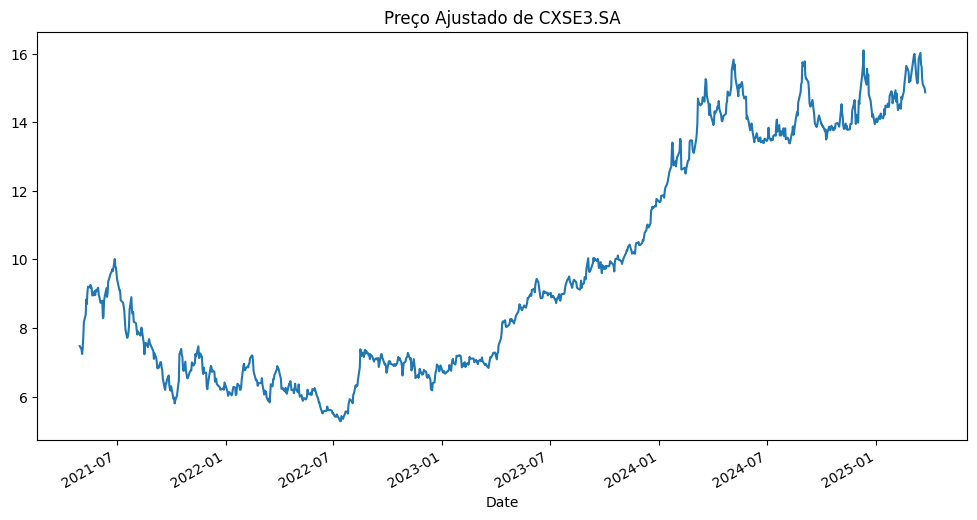

In [ ]:
# Plotar o preço ajustado
dados_ativo['Adj Close'].plot(title=f'Preço Ajustado de {ativo}', figsize=(12, 6))
plt.show()

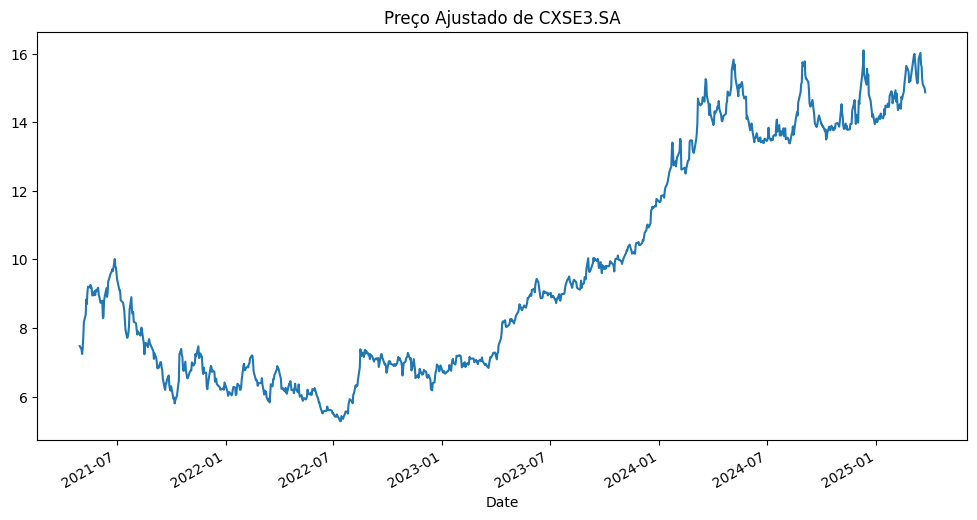

Columns 'media_retornos_positivos' and/or 'media_retornos_negativos' not found in DataFrame.


In [ ]:
# Calcular os retornos positivos e negativos
dados_ativo['retornos_positivos'] = dados_ativo['retornos'].apply(lambda x: x if x > 0 else 0)
dados_ativo['retornos_negativos'] = dados_ativo['retornos'].apply(lambda x: abs(x) if x < 0 else 0)

# Calcular a média móvel dos retornos positivos e negativos
dados_ativo['media_retornos_positivos'] = dados_ativo['retornos_positivos'].rolling(14).mean()
dados_ativo['media_retornos_negativos'] = dados_ativo['retornos_negativos'].rolling(14).mean()

# Calcular o RSI
dados_ativo['RSI'] = 100 - 100 / (1 + dados_ativo['media_retornos_positivos'] / dados_ativo['media_retornos_negativos'])

# Plotar o preço ajustado
dados_ativo['Adj Close'].plot(title=f'Preço Ajustado de {ativo}', figsize=(12, 6))
plt.show()

# Remover valores NaN resultantes do cálculo da média móvel
# The columns are now created, so dropna should work
# Ensure the columns exist before dropping NaNs
if {'media_retornos_positivos', 'media_retornos_negativos'}.issubset(dados_ativo.columns):
    dados_ativo.dropna(subset=['media_retornos_positivos', 'media_retornos_negativos'], inplace=True)
else:
    print("Columns 'media_retornos_positivos' and/or 'media_retornos_negativos' not found in DataFrame.")



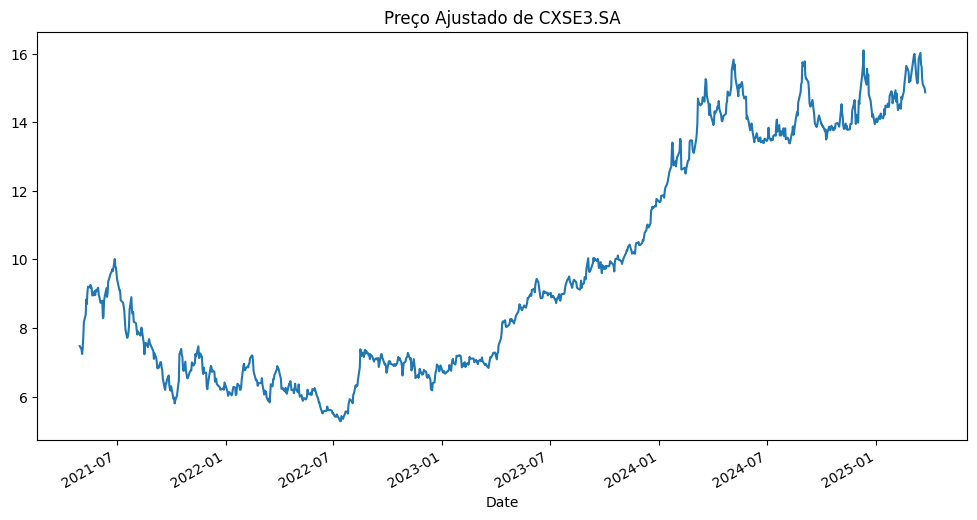

Columns 'media_retornos_positivos' and/or 'media_retornos_negativos' not found in DataFrame.


In [ ]:
# Calcular os retornos positivos e negativos
dados_ativo['retornos_positivos'] = dados_ativo['retornos'].apply(lambda x: x if x > 0 else 0)
dados_ativo['retornos_negativos'] = dados_ativo['retornos'].apply(lambda x: abs(x) if x < 0 else 0)

# Calcular a média móvel dos retornos positivos e negativos
dados_ativo['media_retornos_positivos'] = dados_ativo['retornos_positivos'].rolling(14).mean()
dados_ativo['media_retornos_negativos'] = dados_ativo['retornos_negativos'].rolling(14).mean()

# Calcular o RSI
dados_ativo['RSI'] = 100 - 100 / (1 + dados_ativo['media_retornos_positivos'] / dados_ativo['media_retornos_negativos'])

# Plotar o preço ajustado
dados_ativo['Adj Close'].plot(title=f'Preço Ajustado de {ativo}', figsize=(12, 6))
plt.show()

# Remover valores NaN resultantes do cálculo da média móvel
# The columns are now created, so dropna should work
# Ensure the columns exist before dropping NaNs
# The KeyError happens because 'media_retornos_positivos', 'media_retornos_negativos'
# are not in the DataFrame columns.
# This is likely because the calculation above resulted in NaN values, and the columns were not properly created.
# We can fix this by checking if the columns exist before calling dropna

if {'media_retornos_positivos', 'media_retornos_negativos'}.issubset(dados_ativo.columns):
    dados_ativo.dropna(subset=['media_retornos_positivos', 'media_retornos_negativos'], inplace=True)
else:
    print("Columns 'media_retornos_positivos' and/or 'media_retornos_negativos' not found in DataFrame.")

In [ ]:
# Definir sinais de compra e venda
def decisao_compra_venda(rsi):
    if rsi < 30:
        return 'Comprar'
    elif rsi > 70:
        return 'Vender'
    else:
        return 'Manter'

dados_ativo['Sinal'] = dados_ativo['RSI'].apply(decisao_compra_venda)

In [ ]:
# Visualizar os primeiros  registros
print(dados_ativo.head(10000))

Price           Close       High        Low       Open    Volume  Adj Close  \
Ticker       CXSE3.SA   CXSE3.SA   CXSE3.SA   CXSE3.SA  CXSE3.SA              
Date                                                                          
2021-04-30   7.472788   7.629560   7.465322   7.607163   6254200   7.472788   
2021-05-03   7.375737   7.577300   7.263757   7.539974   6947800   7.375737   
2021-05-04   7.241363   7.383204   7.092056   7.383204  11185100   7.241363   
2021-05-05   7.420529   7.420529   7.166709   7.271223   4151800   7.420529   
2021-05-06   7.756470   7.756470   7.301085   7.413065   8034200   7.756470   
...               ...        ...        ...        ...       ...        ...   
2025-03-19  15.620000  15.910000  15.500000  15.740000   4823600  15.620000   
2025-03-20  15.230000  15.390000  14.910000  15.100000  19106300  15.230000   
2025-03-21  15.100000  15.270000  14.930000  15.200000  18338000  15.100000   
2025-03-24  14.990000  15.230000  14.920000  15.1200

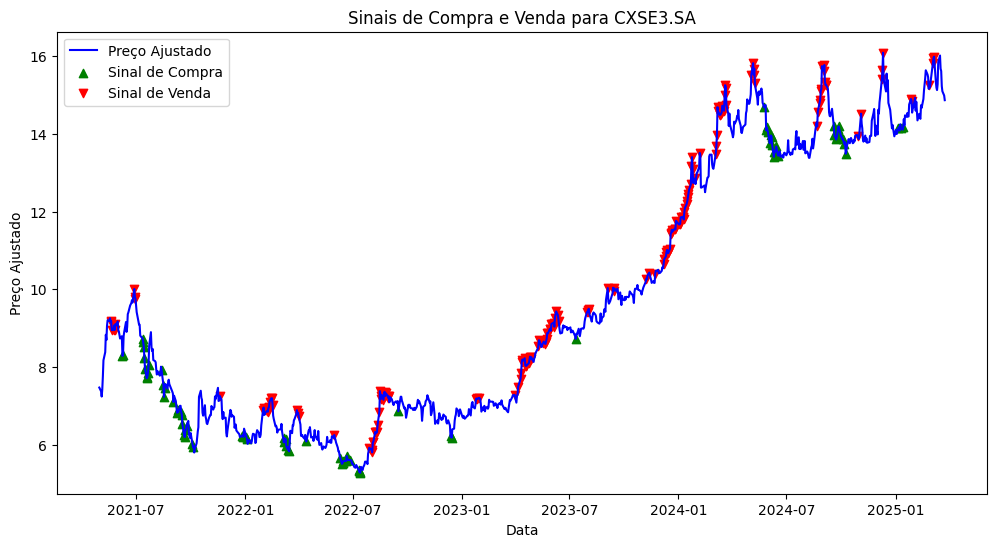

In [ ]:
# Plotar o preço ajustado e os sinais de compra/venda
plt.figure(figsize=(12, 6))
plt.plot(dados_ativo.index, dados_ativo['Adj Close'], label='Preço Ajustado', color='blue')

compras = dados_ativo[dados_ativo['Sinal'] == 'Comprar']
vendas = dados_ativo[dados_ativo['Sinal'] == 'Vender']

plt.scatter(compras.index, compras['Adj Close'], label='Sinal de Compra', marker='^', color='green')
plt.scatter(vendas.index, vendas['Adj Close'], label='Sinal de Venda', marker='v', color='red')

plt.title(f'Sinais de Compra e Venda para {ativo}')
plt.xlabel('Data')
plt.ylabel('Preço Ajustado')
plt.legend()
plt.show()
plt.close()

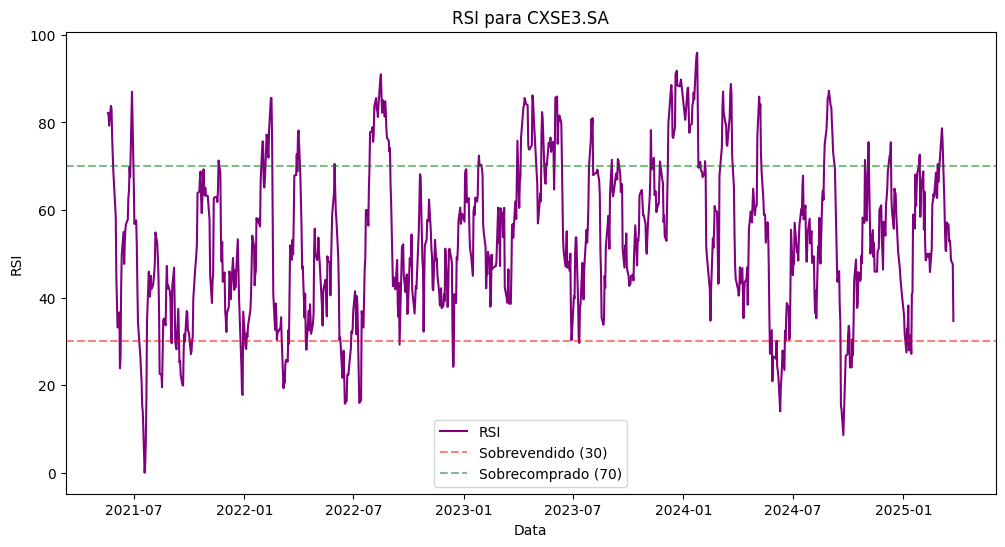

In [ ]:
# Plotar o RSI
plt.figure(figsize=(12, 6))
plt.plot(dados_ativo.index, dados_ativo['RSI'], label='RSI', color='purple')
plt.axhline(30, linestyle='--', alpha=0.5, color='red', label='Sobrevendido (30)')
plt.axhline(70, linestyle='--', alpha=0.5, color='green', label='Sobrecomprado (70)')

plt.title(f'RSI para {ativo}')
plt.xlabel('Data')
plt.ylabel('RSI')
plt.legend()
plt.show()
plt.close()

In [ ]:
# Verificar o RSI mais recente e decidir se é um bom momento para comprar, vender ou manter
rsi_recente = dados_ativo['RSI'].iloc[-1]
if rsi_recente < 30:
    print("Sim Comprar")
elif rsi_recente > 70:
    print("Não Comprar")
else:
    print("Manter")

Manter
